<a href="https://colab.research.google.com/github/SavannahY/Global-A.I.-Data-Science/blob/master/SDGfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/




## Load the data in Python

In [ ]:
## use google drive to load the data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [ ]:
## load the data into pandas data frame
path = 'gdrive/My Drive/SDG_Data_File_Daily.csv'
df = pd.read_csv(path)

In [ ]:
## shape of data
print('rows:',df.shape[0], 'columns:', df.shape[1])

rows: 1604138 columns: 96


### description of the dataset

In [ ]:
df.head(1)

,Unnamed: 0,Timestamp,Ticker,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
0,0,2013-04-01,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail(1)

,Unnamed: 0,Timestamp,Ticker,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
1604137,1604137,2020-04-22,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01937,1.013147,0.360956,0.408976,0.403048,0.373011,-0.011969,0.107059,0.276274,0.190006,0.527436,-0.533966,-0.088535,0.077056,-0.089266,0.399164,...,0.159839,0.71511,0.683689,0.574723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has 1604128 rows and 96 columns. The first date is 2013-04-01. The last date is 2020-04-22.

The 11 GICS sectors are 'Health Care' 'Industrials' 'Consumer Discretionary' 'Information Technology' 'Financials' 'Consumer Staples' 'Utilities' 'Materials' 'Real Estate' 'Energy' 'Communication Services'.

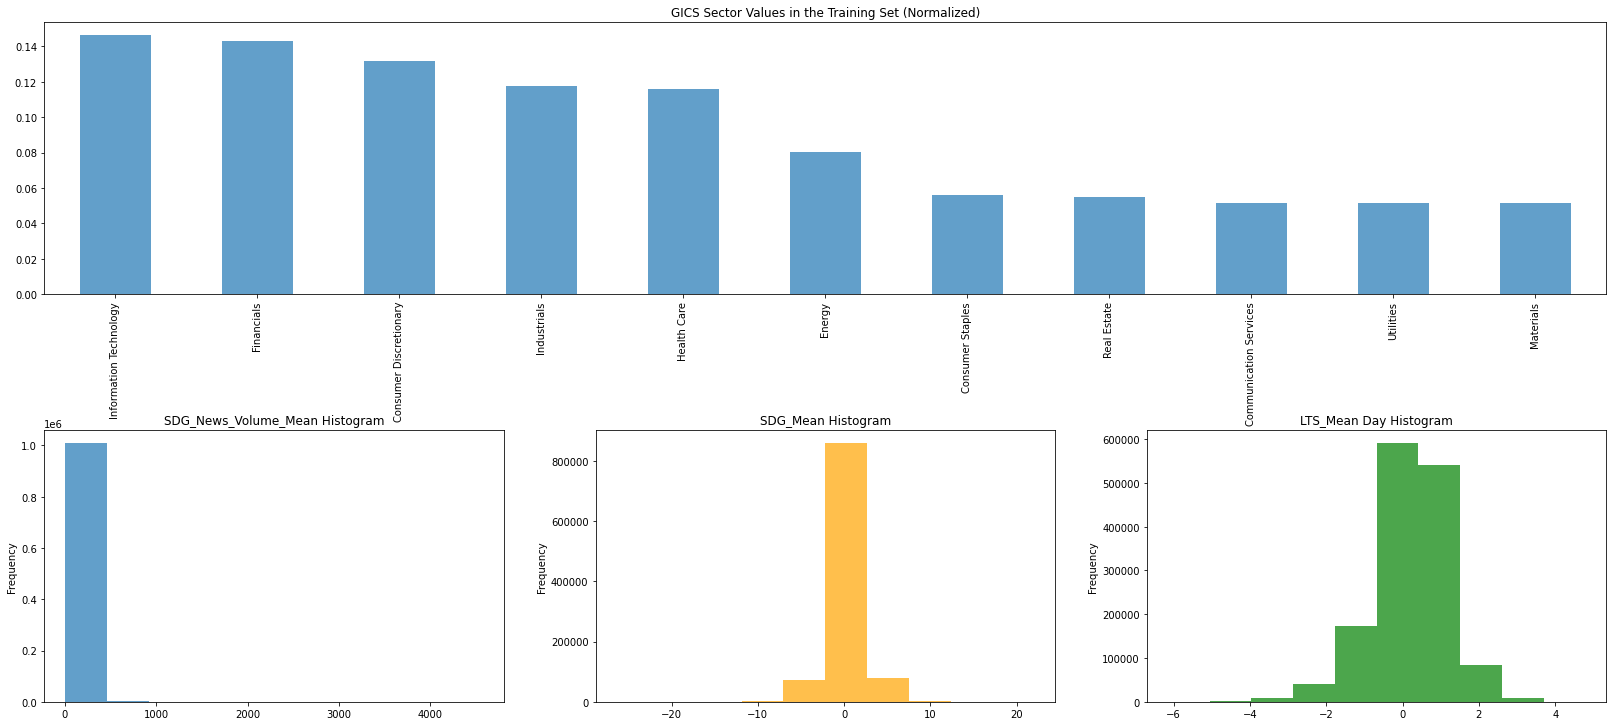

In [ ]:
fig = plt.figure(figsize=(28,20))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
df['GICS Sector'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('GICS Sector Values in the Training Set (Normalized)')

plt.subplot2grid((3,3), (1,0))
df['SDG_News_Volume_Mean'].plot(kind='hist', alpha=0.7)
plt.title('SDG_News_Volume_Mean Histogram')

plt.subplot2grid((3,3), (1,1))
df['SDG_Mean'].plot(kind='hist', alpha=0.7, color='orange')
plt.title('SDG_Mean Histogram')

plt.subplot2grid((3,3), (1,2))
df['LTS_Mean'].plot(kind='hist', alpha=0.7, color='green')
plt.title('LTS_Mean Day Histogram')


plt.show()

In [ ]:
print(df['GICS Sector'].unique(), len(df['GICS Sector'].unique()))

['Health Care' 'Industrials' 'Consumer Discretionary'
 'Information Technology' 'Financials' 'Consumer Staples' 'Utilities'
 'Materials' 'Real Estate' 'Energy' 'Communication Services'] 11


In [ ]:
df.describe()

,Unnamed: 0,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,STS_17,STS_Mean,LTS_1,LTS_2,LTS_3,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
count,1.604138e+06,387681.000000,422694.000000,805362.000000,648846.000000,229394.000000,344897.000000,503870.000000,911957.000000,685784.000000,720027.000000,896346.000000,516385.000000,365288.000000,318833.000000,393312.000000,821992.000000,352580.000000,1.015324e+06,1.266540e+06,1.302011e+06,1.445644e+06,1.420867e+06,1.058791e+06,1.233136e+06,1.336369e+06,1.484403e+06,1.430361e+06,1.451407e+06,1.481187e+06,1.352800e+06,1.241856e+06,1.215373e+06,1.255458e+06,1.471184e+06,1.220113e+06,1.501782e+06,1.150773e+06,1.191963e+06,1.382040e+06,...,1.148964e+06,1.407379e+06,1.112797e+06,1.449726e+06,387681.000000,422694.000000,805362.000000,648846.000000,229394.000000,344897.000000,503870.000000,911957.000000,685784.000000,720027.000000,896346.000000,516385.000000,365288.000000,318833.000000,393312.000000,821992.000000,352580.000000,1.015324e+06,387681.000000,422694.000000,805362.000000,648846.000000,229394.000000,344897.000000,503870.000000,911957.000000,685784.000000,720027.000000,896346.000000,516385.000000,365288.000000,318833.000000,393312.000000,821992.000000,352580.000000,1.015324e+06
mean,8.020685e+05,-0.357852,0.062671,0.072872,0.719752,-1.380533,0.197805,0.108781,0.496932,-0.080738,0.107780,0.170012,0.010821,-0.443993,-0.159447,-0.398468,-0.182030,0.052788,2.831794e-01,-9.835792e-02,1.525737e-01,1.616909e-01,5.706206e-01,-5.394000e-01,2.861254e-01,2.055383e-01,4.735408e-01,7.855393e-02,1.717742e-01,2.021815e-01,1.253681e-01,-1.410265e-01,9.690566e-02,-1.021641e-01,-3.074522e-03,1.872461e-01,1.738749e-01,-1.951641e-01,1.931800e-01,2.166288e-01,...,-2.065652e-01,-1.967385e-02,2.295757e-01,2.059033e-01,1.830937,1.825867,1.947087,1.957604,2.033796,1.632097,1.649796,1.805746,1.921903,1.907206,1.937824,1.771611,1.819514,1.838424,1.828259,1.903333,1.771369,1.741477e+00,16.020963,13.972096,37.111761,28.377883,22.379870,9.318272,14.489539,36.883895,32.092309,40.255782,47.675005,16.328195,15.170356,11.717297,15.620668,46.400214,12.311924,1.691596e+01
std,4.630749e+05,2.102821,2.070824,2.068438,2.135078,2.658081,1.948228,1.796993,1.757527,2.071301,1.987096,1.983880,2.002093,2.153003,2.234790,2.156520,2.024761,2.146515,1.857531e+00,9.875986e-01,9.556521e-01,9.661291e-01,9.506840e-01,1.003356e+00,9.900551e-01,9.969123e-01,9.914281e-01,9.972469e-01,9.868459e-01,9.730402e-01,9.845476e-01,9.638124e-01,9.845512e-01,9.593857e-01,9.891114e-01,9.636989e-01,9.626420e-01,9.934300e-01,9.437956e-01,9.974397e-01,...,9.558929e-01,1.041336e+00,9.491697e-01,9.682403e-01,1.006029,1.007001,1.150142,1.080429,1.144429,0.954200,0.915378,1.009010,1.063366,1.035522,1.117093,0.978430,1.004856,1.020241,1.011565,1.122822,0.990017,7.414263e-01,75.531211,63.640417,251.011407,179.137799,117.444728,29.605740,49.687493,221.383753,195.607193,258.107416,335.831275,69.882129,74.771148,51.224955,78.833347,317.423683,50.670370,1.128878e+02
min,0.000000e+00,-21.967213,-21.967213,-26.383565,-26.383565,-24.137931,-16.409861,-16.586151,-26.383565,-19.975031,-17.957505,-26.383565,-20.772239,-17.391304,-18.604651,-17.391304,-26.383565,-18.835616,-2.638357e+01,-8.262921e+00,-8.081865e+00,-9.468227e+00,-8.237315e+00,-8.358393e+00,-9.178661e+00,-9.617961e+00,-1.107147e

In [ ]:
print(df['Ticker'].unique(), len(df['Ticker'].unique()))

['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACGL' 'ACN' 'ADBE' 'ADI' 'ADM'
 'ADP' 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFG' 'AFL' 'AGCO' 'AGN' 'AIG'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALGN' 'ALKS' 'ALL' 'ALLE' 'ALLY' 'ALNY' 'ALV'
 'ALXN' 'AMAT' 'AMD' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AMTD' 'AMZN' 'AN'
 'ANDV' 'ANET' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC' 'APD' 'APH' 'APTV'
 'AR' 'ARMK' 'ARW' 'ASH' 'ATH' 'ATO' 'ATVI' 'AVB' 'AVP' 'AVT' 'AVY' 'AWK'
 'AXP' 'AXS' 'AXTA' 'AYI' 'AZO' 'BAC' 'BAX' 'BBBY' 'BBT' 'BBY' 'BDX' 'BEN'
 'BF/B' 'BG' 'BHF' 'BHGE' 'BIIB' 'BK' 'BLK' 'BLL' 'BMRN' 'BMY' 'BR'
 'BRK/B' 'BRX' 'BSX' 'BWA' 'BXP' 'C' 'CA' 'CAG' 'CAH' 'CAT' 'CB' 'CBOE'
 'CBRE' 'CBS' 'CC' 'CCI' 'CCK' 'CCL' 'CDK' 'CDNS' 'CDW' 'CE' 'CELG' 'CERN'
 'CF' 'CFG' 'CGNX' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CINF' 'CIT' 'CL' 'CLB' 'CLR'
 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG'
 'COMM' 'COO' 'COP' 'COST' 'COTY' 'CPB' 'CPT' 'CREE' 'CRM' 'CSCO' 'CSGP'
 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' '

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count[6:6+18]

SDG_1       1216457
SDG_2       1181444
SDG_3        798776
SDG_4        955292
SDG_5       1374744
SDG_6       1259241
SDG_7       1100268
SDG_8        692181
SDG_9        918354
SDG_10       884111
SDG_11       707792
SDG_12      1087753
SDG_13      1238850
SDG_14      1285305
SDG_15      1210826
SDG_16       782146
SDG_17      1251558
SDG_Mean     588814
dtype: int64

We have 1604138 in total and more than half of the columns are blank.

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

43.28540533399662


## Data preprocessing

### Choose CMCSA

In [ ]:
CMCSA_data = df[df.Ticker.isin(['CMCSA'])]

In [ ]:
CMCSA = CMCSA_data[ ['Timestamp'] + list(CMCSA_data.loc[:,'SDG_Mean':'SDG_Mean']) ]

In [ ]:
print(CMCSA['Timestamp'].dtype)

object


In [ ]:
CMCSA['Timestamp'] = pd.to_datetime(CMCSA['Timestamp'])
CMCSA.set_index('Timestamp',inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
CMCSA.head(1)

,SDG_Mean
Timestamp,
2013-04-01,-1.618407


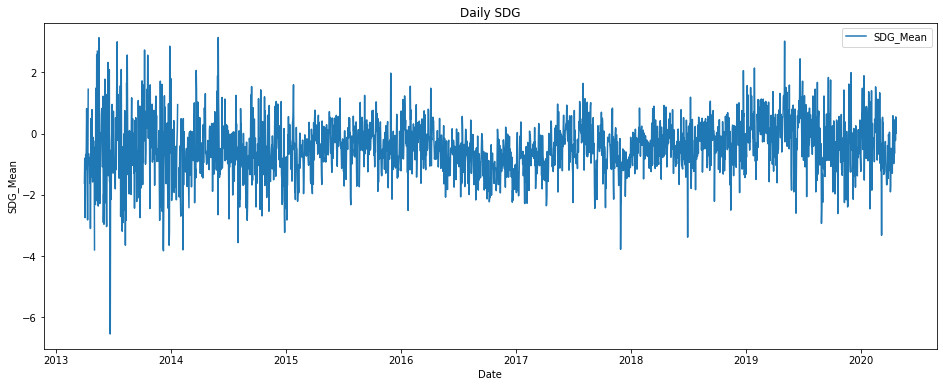

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Daily SDG")
plt.xlabel("Date")
sns.lineplot(data=CMCSA.loc[:,'SDG_Mean'], label = 'SDG_Mean')

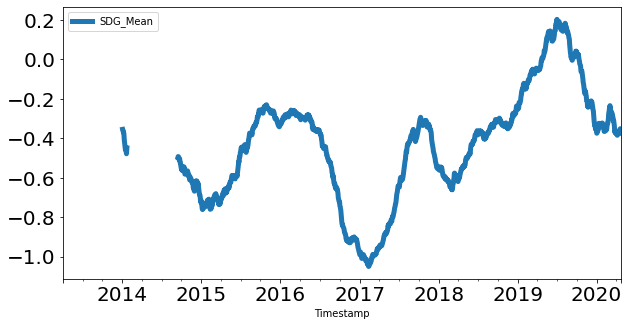

In [ ]:
SDG_Mean = CMCSA[['SDG_Mean']]
SDG_Mean.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)


In [ ]:
## fill na
CMCSA.fillna(value=0)

,SDG_Mean
Timestamp,
2013-04-01,-1.618407
2013-04-02,-0.804909
2013-04-03,-2.743327
2013-04-04,-2.010976
2013-04-05,-0.681165
...,...
2020-04-18,-0.183266
2020-04-19,0.457098
2020-04-20,-0.223043


### stationary

In [ ]:
#Creating train and test set 
train = CMCSA['2020-03-03':'2020-04-15']
test = CMCSA['2020-04-15':'2020-04-22']


In [ ]:
train.tail()

,SDG_Mean
Timestamp,
2020-04-11,-0.244109
2020-04-12,0.584394
2020-04-13,0.452586
2020-04-14,-0.955745
2020-04-15,-0.977786


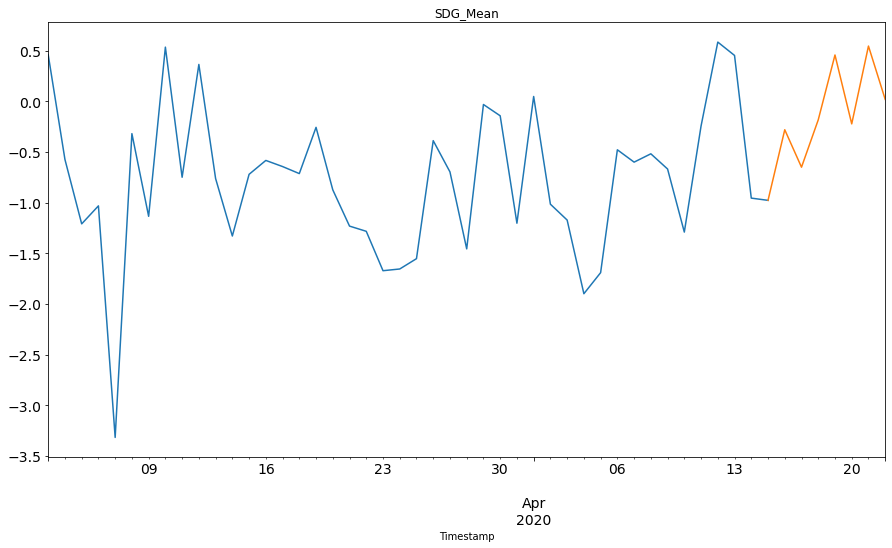

In [ ]:
#Plotting data
train.SDG_Mean.plot(figsize=(15,8), title= 'SDG_Mean', fontsize=14)
test.SDG_Mean.plot(figsize=(15,8), title= 'SDG_Mean', fontsize=14)
plt.show()

## Forecast


In [ ]:
import statsmodels

### Method 1: Start with a Naive Approach


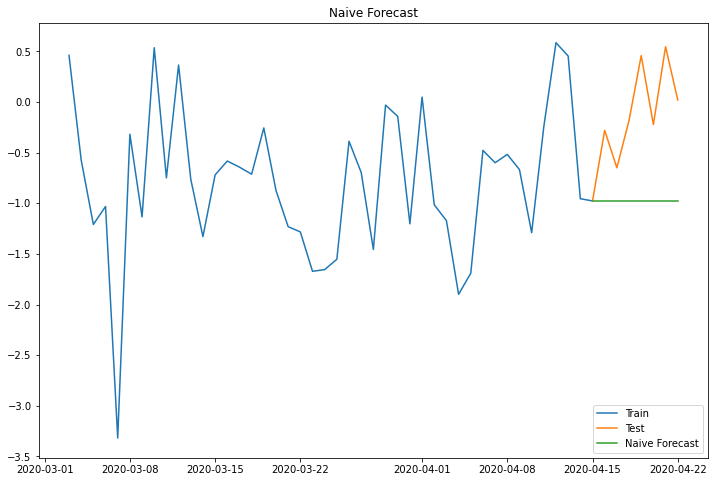

In [ ]:
dd= np.asarray(train.SDG_Mean)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['SDG_Mean'], label='Train')
plt.plot(test.index,test['SDG_Mean'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.SDG_Mean, y_hat.naive))
print(rms)

0.9463902715848439


### Method 2: – Simple Average


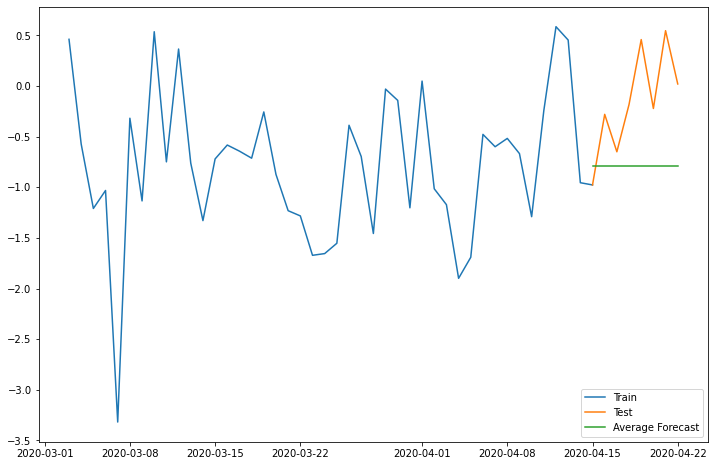

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['SDG_Mean'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['SDG_Mean'], label='Train')
plt.plot(test['SDG_Mean'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.SDG_Mean, y_hat_avg.avg_forecast))
print(rms)

0.7875695252258305


### Method 3 – Moving Average


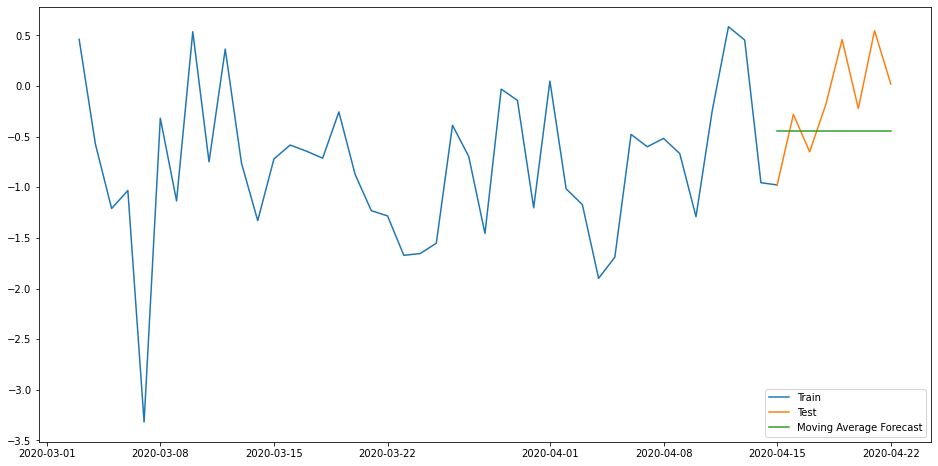

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['SDG_Mean'].rolling(7).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['SDG_Mean'], label='Train')
plt.plot(test['SDG_Mean'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.SDG_Mean, y_hat_avg.moving_avg_forecast))
print(rms)

0.5557141483804899


### Method 4 – Simple Exponential Smoothing

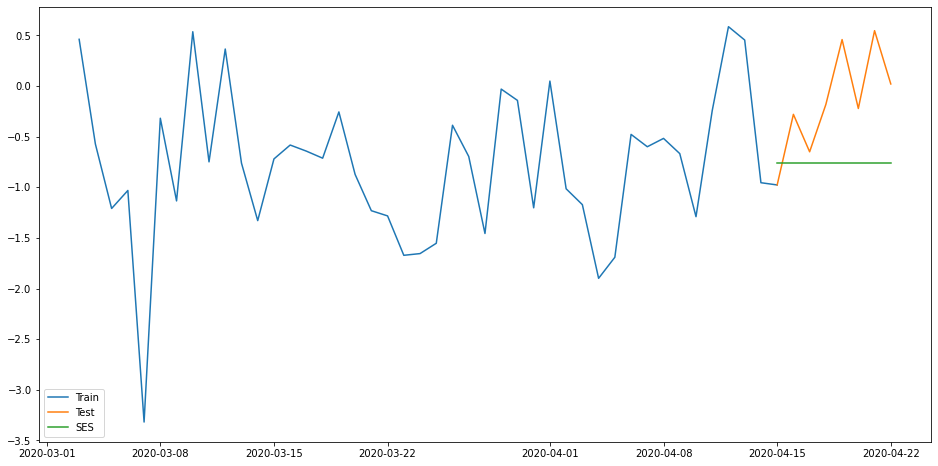

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['SDG_Mean'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['SDG_Mean'], label='Train')
plt.plot(test['SDG_Mean'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.SDG_Mean, y_hat_avg.SES))
print(rms)

0.7700892305657422


### Method 5 – Holt’s Linear Trend method


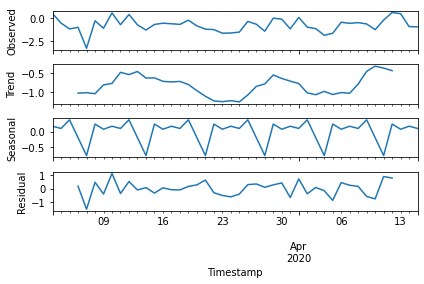

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.SDG_Mean).plot()
result = sm.tsa.stattools.adfuller(train.SDG_Mean)
plt.show()

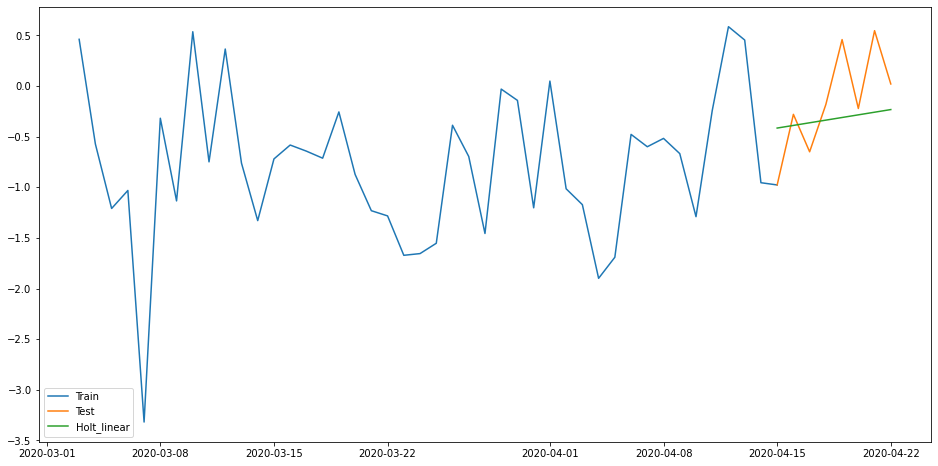

In [ ]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['SDG_Mean'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['SDG_Mean'], label='Train')
plt.plot(test['SDG_Mean'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.SDG_Mean, y_hat_avg.Holt_linear))
print(rms)

0.7226417921235145


### Method 6 – Holt-Winters Method


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


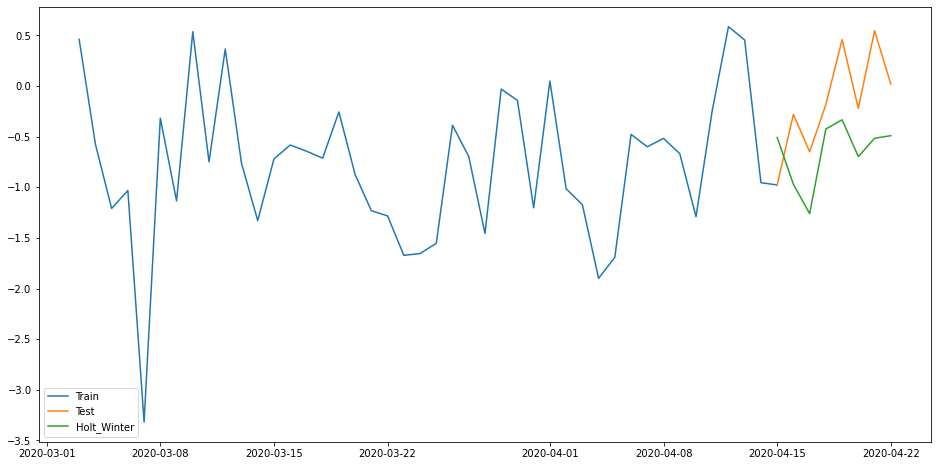

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['SDG_Mean']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['SDG_Mean'], label='Train')
plt.plot(test['SDG_Mean'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.SDG_Mean, y_hat_avg.Holt_Winter))
print(rms)

0.649093028228502


### Method 7 – ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


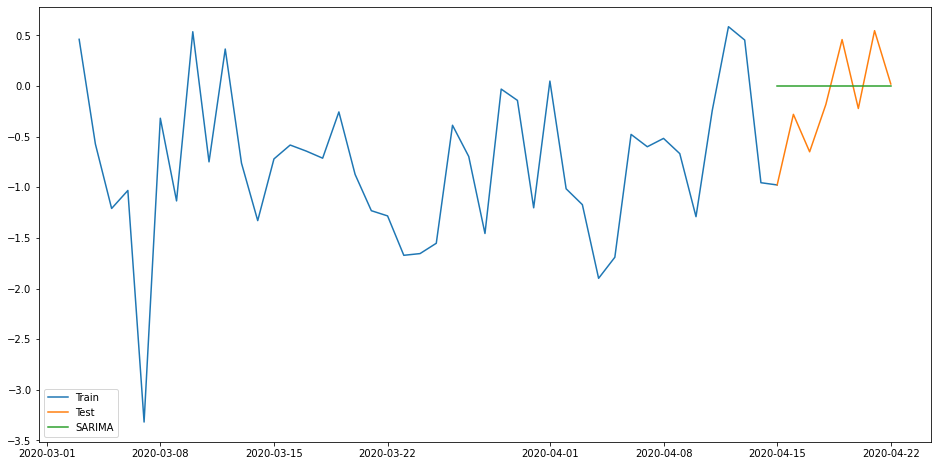

In [ ]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.SDG_Mean, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2020-03-03", end="2020-04-22", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['SDG_Mean'], label='Train')
plt.plot(test['SDG_Mean'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.SDG_Mean, y_hat_avg.SARIMA))
print(rms)

0.5059455539569682


### compare

In [ ]:
# initialize list of lists 
data = [['Naive Approach', 0.946], ['Simple Average', 0.788], ['Moving Average', 0.556],['Simple Exponential Smoothing',0.770],
        ['Holt’s Linear Trend method',0.722],['Holt-Winters Method',0.649],['ARIMA',0.506]] 
  
# Create the pandas DataFrame 
perform = pd.DataFrame(data, columns = ['Method', 'rms']) 
  

In [ ]:
perform

,Method,rms
0,Naive Approach,0.946
1,Simple Average,0.788
2,Moving Average,0.556
3,Simple Exponential Smoothing,0.770
4,Holt’s Linear Trend method,0.722
5,Holt-Winters Method,0.649
6,ARIMA,0.506
